- Declara las clasese abstractas y metodos abstractos
- Definicion de la clase vehiculos, que es una clase abstracta y tiene un metodo abstacto
- Metodo para asignar la estrategia de conduccion y otro para conducir 


### **Codigo**

In [15]:
from abc import ABC, abstractmethod

#Estrategia de conduccion
class EstrategiaConduccion(ABC):
    @abstractmethod
    def conducir(self, vehiculo):
        pass
    
class ConduccionNormal(EstrategiaConduccion):
    def conducir(self, vehiculo):
        print(f"\nAuto: '{vehiculo.tipo()}' '{vehiculo.marca}' '{vehiculo.modelo}'\n")
        print(f"{vehiculo.tipo()}: '{vehiculo.marca}' '{vehiculo.modelo}'  Conducción de manera normal activada.")
        #return "Condución de manera Normal activada."

class ConduccionDeportiva(EstrategiaConduccion):
    def conducir(self, vehiculo):
        print(f"{vehiculo.tipo()}: '{vehiculo.marca}' '{vehiculo.modelo}' Conducción de maneradeportiva activada.")
        #return "Condución de manera Deportiva activada."

class ConduccionEconomica(EstrategiaConduccion):
    def conducir(self, vehiculo):
        print(f"{vehiculo.tipo()}: '{vehiculo.marca}' '{vehiculo.modelo}'  Condución de manera economica activada.")
        #return "Conducción de manera Economica activada."
    
#Clase abstracta Vehiculo
class Vehiculo(ABC):
    def __init__ (self, marca, modelo):
        self.marca = marca
        self.modelo = modelo
        self.conduccion = None
        
    def set_conduccion(self, estrategia):
        self.conduccion = estrategia
        
    def conducir(self):
        if self.conduccion:
            self.conduccion.conducir(self)
        else:
            print("No hay estrategia de conducción asignada.")
    
    @abstractmethod
    def tipo(self):
        pass
    
    def __eq__(self, other):
        return isinstance(other, Vehiculo) and self.marca == other.marca and self.modelo == other.modelo
    
    def __add__(self, other):
        if isinstance(other, Vehiculo):
            flota = ControlDeFlota.obtener_instancia()
            flota.agregar_vehiculo(other)
            return self
        raise TypeError("Solo se pueden agregar objetos de tipo Vehiculo a la flota.")

#Subclase concretas
class Automovil(Vehiculo):
    def tipo(self):
        return "Automovil"

class Camion(Vehiculo):
    def tipo(self):
        return "Camion"
    
class Motocicleta(Vehiculo):
    def tipo(self):
        return "Motocicleta"
    
#Decorator Patters
class VehiculoDecorator(Vehiculo):
    def __init__(self, vehiculo):
        self.vehiculo = vehiculo
    
    def __getattr__(self, nombre):
        return getattr(self.vehiculo, nombre)
    
    def tipo(self):
        return self.vehiculo.tipo()
    
    def conducir(self):
        self.vehiculo.conducir()
        
    def __eq__(self, other):
        return self.vehiculo == other
    
    def __add__(self, other):
        return self.vehiculo + other
    
class PilotoAutomaticoDecorator(VehiculoDecorator):
    def conducir(self):
        self.vehiculo.conducir()
        print("-> Piloto automatico activado.")
        
class AsistenteEstacionamientoDecarator(VehiculoDecorator):
    def conducir(self):
        self.vehiculo.conducir()
        print("-> Asistente de estacionamiento activado.")
        
#Singleton Pattern
class ControlDeFlota:
    _instancia = None
    
    def __init__(self):
        if ControlDeFlota._instancia is not None:
            raise Exception("Esta clase esta en sigleton")
        self.vehiculos = []
        
    @staticmethod
    def obtener_instancia():
        if ControlDeFlota._instancia is None:
            ControlDeFlota._instancia = ControlDeFlota()
        return ControlDeFlota._instancia
    
    def agregar_vehiculo(self, vehiculo):
        if vehiculo not in self.vehiculos:
            self.vehiculos.append(vehiculo)
    
    def listar_vehiculos(self):
        print("\n Flota de Vehiculo actual:")
        for r in self.vehiculos:
            print(f"·{r.tipo()}: {r.marca} {r.modelo}")
        if not self.vehiculos:
            print("-> No hay vehiculos en la Flota")
        
        
        
    

In [16]:
if __name__ == "__main__":
    auto = Automovil("Toyota", "Corolla")
    camion = Camion("Ford", "F-150")
    moto = Motocicleta("Honda", "CBR")
    
    #Asignar estrategias de conduccion
    auto.set_conduccion(ConduccionNormal())
    camion.set_conduccion(ConduccionDeportiva())
    moto.set_conduccion(ConduccionEconomica())
    
    #Aplicar Decoradores
    autoDec = PilotoAutomaticoDecorator(auto)
    camionDec= AsistenteEstacionamientoDecarator(camion)
    
    auto.conducir()
    moto.conducir()
    camion.conducir()
    
    otro_auto = Automovil("Toyota", "Corolla")
    print("\n¿Son iguales?", auto == otro_auto)
    
    auto + moto
    auto + camion
    
    flota = ControlDeFlota.obtener_instancia()
    flota.listar_vehiculos()

    
    
    
        


Auto: 'Automovil' 'Toyota' 'Corolla'

Automovil: 'Toyota' 'Corolla'  Conducción de manera normal activada.
Motocicleta: 'Honda' 'CBR'  Condución de manera economica activada.
Camion: 'Ford' 'F-150' Conducción de maneradeportiva activada.

¿Son iguales? True

 Flota de Vehiculo actual:
·Motocicleta: Honda CBR
·Camion: Ford F-150


### **Diagrama UML**
- Diagrama de clases (con herencia, estrategias, decoradores, singleton).

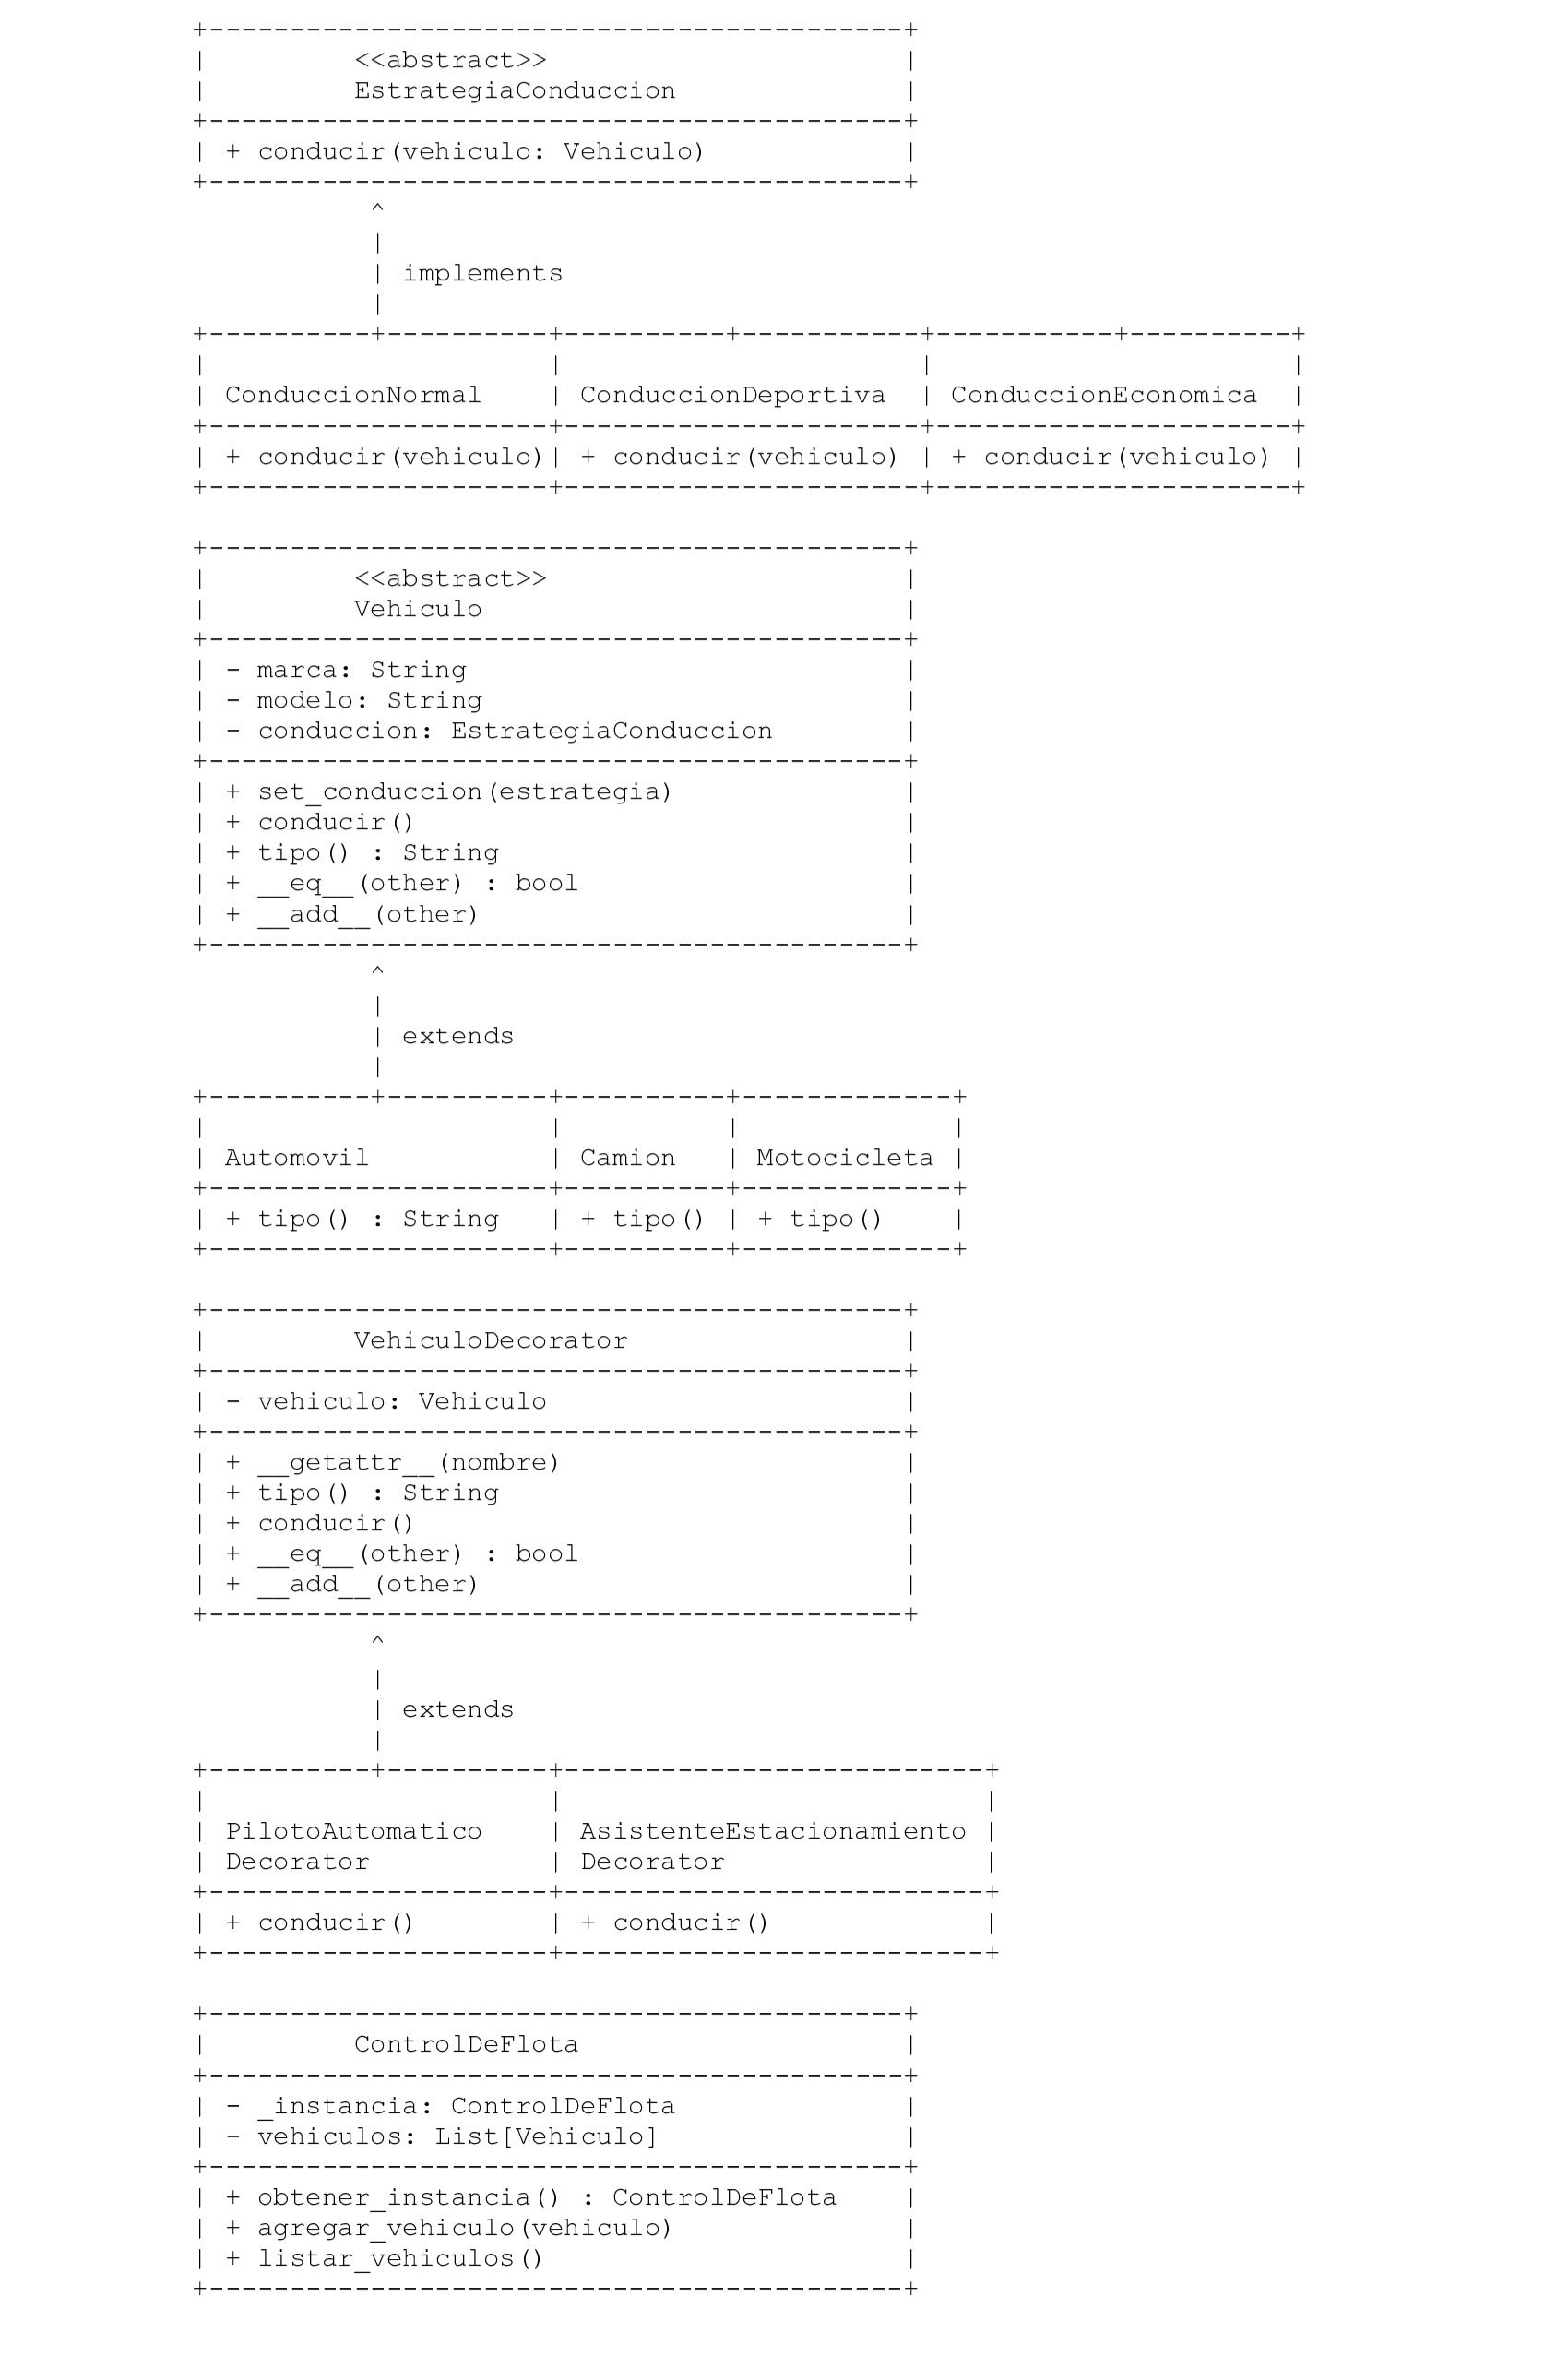